In [1]:
from statsmodels.tsa.arima_process import ArmaProcess
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Generate parameters for AR(1) with phi = 0.5
ar_params = np.asarray([1, -0.6])
ma_params = np.asarray([1])
AR1 = ArmaProcess(ar_params, ma_params)
ar1_sample = AR1.generate_sample(nsample=1000)

# Generate parameters for AR{1} with phi = 1.0
ar_params2 = np.asarray([1, -1.0])
ma_params2 = np.asarray([1])
AR1_2 = ArmaProcess(ar_params2, ma_params2)
ar1_sample2 = AR1_2.generate_sample(nsample=1000)

In [3]:
ar_params3 = np.asarray([1, -1.0])
ma_params3 = np.asarray([1])
AR1_3 = ArmaProcess(ar_params3, ma_params3)
ar1_sample3 = AR1_3.generate_sample(nsample=1000)

In [4]:
test2 = ar1_sample3

In [209]:
ar_params = np.asarray([1, -0.5])
ma_params = np.asarray([1])
AR1 = ArmaProcess(ar_params, ma_params)
ar1_sample = AR1.generate_sample(nsample=1000)

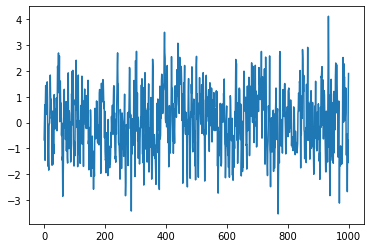

In [210]:
plt.plot(ar1_sample)

In [220]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()
m_sample = mm.fit_transform(np.reshape(ar1_sample, (-1,1)))
m_sample = np.ndarray.flatten(m_sample)

In [58]:
all_sample = np.concatenate([ar1_sample2, ar1_sample])

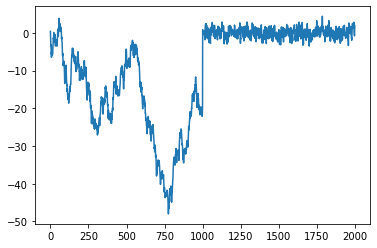

In [59]:
plt.plot(all_sample)

In [221]:
window = 120
train = np.asarray([m_sample[i:i+window] for i in range(len(ar1_sample) - window + 1)])[:,:,np.newaxis]
test = np.asarray([ar1_sample[i:i+window] for i in range (len(ar1_sample2) - window + 1)])[:,:,np.newaxis]
test2 = np.asarray([ar1_sample3[i:i+window] for i in range (len(ar1_sample2) - window + 1)])[:,:,np.newaxis]

In [412]:
import pickle as pkl

with open('AR_run3/train_data.pkl', 'wb') as f:
    pkl.dump(train,f)

In [217]:
from importlib import reload
import vrnngan2
vrnngan = reload(vrnngan2)

In [256]:
import tensorflow as tf
from tensorflow import keras
keras.backend.clear_session()
tf.compat.v1.reset_default_graph()
del vrnn
del model
tf.random.set_seed(3)

In [223]:
from vrnngan2 import VRNNGRU, lagCallback
from tensorflow import keras
import os
keras.backend.clear_session()
timesteps = train.shape[1]
feature_space = train.shape[2]
z_dim = 32
hidden_dim = 64
vrnn = VRNNGRU(feature_space, z_dim, hidden_dim, timesteps)
vrnn.compile(keras.optimizers.Adam(lr=0.001))
vrnn.fit(train, train, batch_size= 20, epochs=10)

/mnt/c/Users/jchle/Work/Thesis/VAECJ/bash_venv/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/10
45/45 [==============================] - 7s 92ms/step - total_loss: -13.7239 - loss: -13.7688 - kl: 0.0202
Epoch 2/10
45/45 [==============================] - 4s 91ms/step - total_loss: -13.6399 - loss: -13.4937 - kl: 5.9678e-05
Epoch 3/10
45/45 [==============================] - 4s 90ms/step - total_loss: -13.9552 - loss: -13.6467 - kl: 3.9591e-04
Epoch 4/10
45/45 [==============================] - 4s 92ms/step - total_loss: -17.2047 - loss: -15.9512 - kl: 0.0046
Epoch 5/10
45/45 [==============================] - 4s 93ms/step - total_loss: -28.4947 - loss: -24.5310 - kl: 0.0084
Epoch 6/10
45/45 [==============================] - 4s 94ms/step - total_loss: -52.7900 - loss: -45.4836 - kl: 9.6391e-04
Epoch 7/10
45/45 [==============================] - 4s 94ms/step - total_loss: -83.5756 - loss: -77.3214 - kl: 0.0432
Epoch 8/10
45/45 [==============================] - 4s 95ms/step - total_loss: -105.1676 - loss: -100.0126 - kl: 0.1132
Epoch 9/10
45/45 [========================

In [ ]:
from vrnngan2 import VRNNGRUGAN, lagCallback
from tensorflow import keras
import os

timesteps = train.shape[1]
feature_space = train.shape[2]
z_dim = 32
hidden_dim = 64
model = VRNNGRUGAN(feature_space, z_dim, hidden_dim, timesteps, 20.0, vrnn)
model.compile(keras.optimizers.Adam(lr=0.001), keras.optimizers.Adam(lr=0.001))
model.fit(train, train, batch_size= 20, epochs=300)

In [247]:
model.fit(train, train, batch_size=20, epochs=40)

Epoch 1/40
45/45 [==============================] - 8s 168ms/step - total_loss: -150.6444 - loss: -164.6356 - kl: 0.0048 - discrim_loss: 1.3863 - discrim_loss_fake: 0.6939 - discrim_loss_real: 0.6922
Epoch 2/40
45/45 [==============================] - 7s 166ms/step - total_loss: -150.9223 - loss: -164.3110 - kl: 7.3742e-04 - discrim_loss: 1.3863 - discrim_loss_fake: 0.6916 - discrim_loss_real: 0.6934
Epoch 3/40
45/45 [==============================] - 8s 167ms/step - total_loss: -151.1044 - loss: -164.4700 - kl: 0.0016 - discrim_loss: 1.3868 - discrim_loss_fake: 0.6933 - discrim_loss_real: 0.6932
Epoch 4/40
45/45 [==============================] - 8s 169ms/step - total_loss: -150.9514 - loss: -164.7697 - kl: 0.0016 - discrim_loss: 1.3861 - discrim_loss_fake: 0.6921 - discrim_loss_real: 0.6931
Epoch 5/40
45/45 [==============================] - 8s 169ms/step - total_loss: -151.2142 - loss: -164.8592 - kl: 0.0049 - discrim_loss: 1.3861 - discrim_loss_fake: 0.6930 - discrim_loss_real: 0.6

In [181]:
vrnn.save_weights('AR_run3generator')

In [182]:
model.save_weights('AR_run3/gan')

In [183]:
timesteps = train.shape[1]
feature_space = train.shape[2]
z_dim = 12
hidden_dim = 8
vrnn_ = VRNNGRU(feature_space, z_dim, hidden_dim, timesteps)
vrnn_.load_weights('AR_run2/generator')

model_ = VRNNGRUGAN(feature_space, z_dim, hidden_dim, timesteps, 2.0, vrnn_)
model_.load_weights('AR_run2/gan')

In [ ]:
from vrnngan2 import VRNNGRUGAN, lagCallback
from tensorflow import keras
import os


timesteps = train.shape[1]
feature_space = train.shape[2]
z_dim = 8
hidden_dim = 8
model = VRNNGRUGAN(feature_space, z_dim, hidden_dim, timesteps, 3.0, vrnn)
model.load_weights('vrnnganv2_ar_fit/vrnnganv2_ar_fit')

In [ ]:
from 

In [22]:
outputs, z, q_mu, p_mu, q_logvar, p_logvar, output_mean, output_logvar,_ = model.predict(test2)

In [225]:
outputs, z, q_mu, p_mu, q_logvar, p_logvar, output_mean, output_logvar,_ = model.predict(train)

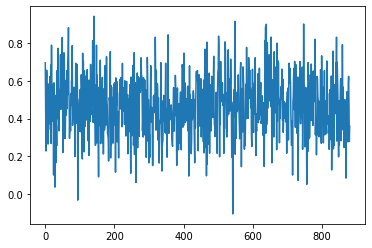

In [226]:
plt.plot(outputs[:,-1,:])

In [149]:
history = ar1_sample[:200]
history = np.reshape(history, (history.shape[0], 1))
results = model.rec_gen(history, 1000)


(-50.0, 10.0)

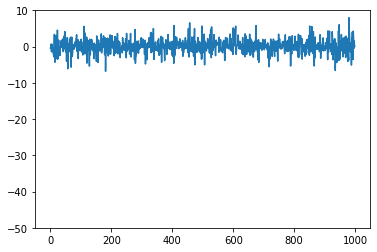

In [608]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.squeeze(results))
plt.ylim([-50,10])

In [252]:
state = None
inp = np.reshape(m_sample[-1], (1,1))
results = []
for i in range(1000):
    outputs, state = vrnn.vrnn_cell(inp, state, inference=False)
    state=[state]
    results.append(outputs[0].numpy())
results = [x[0][0] for x in results]

(0.0, 1.0)

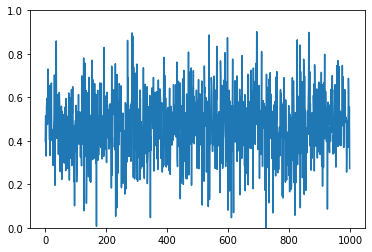

In [253]:
plt.plot(results)
plt.ylim([0,1])

In [254]:
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg

arma_est = sm.tsa.ARIMA(results, order=(1,0,0), trend='n').fit()

In [255]:
arma_est.params

array([0.89729338, 0.0472213 ])

In [263]:
import arviz as az
def seed_hdi(point, state):
    means= []
    stds = []
    inp = np.reshape(np.repeat(point,5000), (5000,1))
    outputs, _ = model.vrnn.vrnn_cell(inp, states=state, inference=True)
    means = np.squeeze(outputs[-3])
    stds = np.squeeze(outputs[-2])

    means_hdi = az.hdi(np.asarray(means),0.99)
    stds_hdi = az.hdi(np.asarray(stds), 0.99)

    return means_hdi, stds_hdi

In [264]:
def seed_hdi2(point, state):
    means= []
    stds = []
    for i in range(1000):
        inp = np.reshape(point, (1,1))
        outputs, _ = model.vrnn_cell(inp, states=state, inference=True)
        means.append(outputs[-3][0][0])
        stds.append(outputs[-2][0][0])

    means_hdi = az.hdi(np.asarray(means),0.99)
    stds_hdi = az.hdi(np.asarray(stds), 0.99)

    return means_hdi, stds_hdi

In [265]:
from scipy.stats import ks_2samp
def cpd2(array):
    '''
    array is a 1-dimensional array of inputs
    '''
    p_vals = []
    cp = []
    
    def sample(point, times, state):
        inp = np.reshape(np.repeat(point, times), (times,1))
        outputs, o_state = model.vrnn.vrnn_cell(inp, state, inference=True)
        means = np.squeeze(outputs[-3])
        stds = np.squeeze(outputs[-2])
        return (means, [o_state])
    
    def  sample2(point, times, state):
        means = []
        inp = np.reshape(point, (1,1))
        for t in range(times):
            outputs, o_state = model.vrnn.vrnn_cell(inp, state, inference=True)
            means.append(outputs[-3][0][0].numpy())
        return means, o_state

    null_means, state = sample(array[0], 1000, None)
    print(null_means)
    for i in range(1, len(array)):
        alt_means, state = sample(array[i], 1000, state) 
        print(alt_means)
        stat, p_val = ks_2samp(null_means, alt_means)
        if p_val < 0.0005:
            null_means = alt_means
            p_vals.append(p_val)
            cp.append(i)    
    print(p_vals)
    return cp
    

In [275]:
import tensorflow as tf
def cpd(array):
    '''
    array is a 1-dimensional array of inputs
    '''
    cp = []
    # seed hdi
    state = None
    means = []
    stds = []
    for i in range(1000):
        inp = np.reshape(np.asarray(array[0]), (1,1))
        outputs, state = vrnn.vrnn_cell(inp, state, inference=False)
        means.append(outputs[-3][0][0])
        stds.append(outputs[-2][0][0])
        state=[state]
    means_hdi = az.hdi(np.asarray(means),0.99)
    stds_hdi = az.hdi(np.asarray(stds), 0.99)
    state = None

    for i in range(len(array)):
        inp = np.reshape(np.asarray(array[i]), (1,1))
        outputs, next_state = model.vrnn.vrnn_cell(inp,  states=state, inference=True)
        mean = outputs[-3][0][0]
        std = outputs[-2][0][0]

        if mean < means_hdi[0] or mean > means_hdi[1] or std < stds_hdi[0] or std > stds_hdi[1]:
            print(mean)
            print(std)
            if state is not None:
                state = tf.convert_to_tensor(np.tile(state, (5000,1)))
            means_hdi, stds_hdi = seed_hdi(array[i], state)
            cp.append(i)
        state=[next_state]
    return cp


In [276]:
samp = np.concatenate((ar1_sample2[500:600], ar1_sample[:100]))

In [277]:
cpd(samp)

tf.Tensor(-33.929462, shape=(), dtype=float32)
tf.Tensor(3.65502, shape=(), dtype=float32)
tf.Tensor(-6.137546, shape=(), dtype=float32)
tf.Tensor(1.0742793, shape=(), dtype=float32)
tf.Tensor(-8.530998, shape=(), dtype=float32)
tf.Tensor(1.2499897, shape=(), dtype=float32)
tf.Tensor(-9.69124, shape=(), dtype=float32)
tf.Tensor(1.3400728, shape=(), dtype=float32)
tf.Tensor(-8.873227, shape=(), dtype=float32)
tf.Tensor(1.2762412, shape=(), dtype=float32)
tf.Tensor(-8.013239, shape=(), dtype=float32)
tf.Tensor(1.2107958, shape=(), dtype=float32)
tf.Tensor(-9.035558, shape=(), dtype=float32)
tf.Tensor(1.2887876, shape=(), dtype=float32)
tf.Tensor(-8.258896, shape=(), dtype=float32)
tf.Tensor(1.2293128, shape=(), dtype=float32)
tf.Tensor(-9.221, shape=(), dtype=float32)
tf.Tensor(1.3031939, shape=(), dtype=float32)
tf.Tensor(-8.37548, shape=(), dtype=float32)
tf.Tensor(1.2381506, shape=(), dtype=float32)
tf.Tensor(-7.7015142, shape=(), dtype=float32)
tf.Tensor(1.1875068, shape=(), dtype=fl

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 10,
 11,
 12,
 13,
 14,
 16,
 17,
 22,
 24,
 26,
 27,
 28,
 30,
 31,
 32,
 35,
 38,
 40,
 41,
 42,
 44,
 45,
 46,
 47,
 50,
 51,
 54,
 57,
 59,
 60,
 61,
 62,
 63,
 64,
 66,
 67,
 72,
 74,
 75,
 76,
 78,
 80,
 81,
 86,
 87,
 88,
 90,
 91,
 92,
 94,
 96,
 98,
 101,
 102,
 115,
 117,
 130,
 132,
 138,
 139,
 141,
 142,
 143,
 146,
 147,
 148,
 151,
 152,
 153,
 183,
 184,
 198,
 199]

In [625]:
model.save_weights('vrnnganv2_ar_fit/vrnnganv2_ar_fit')

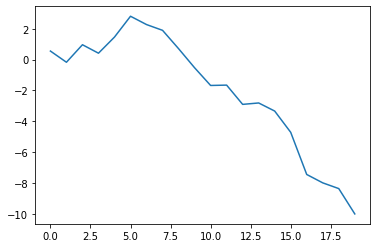

In [308]:
plt.plot(ar1_sample3[:20])

In [606]:
ar1_sample3[0]

0.5510301360734305

In [663]:
ar1_sample3[0:4]


array([ 0.55103014, -0.17467047,  0.96092893,  0.41216287])

In [687]:
[np.tile(ar1_sample3[0:4], [1000,1])]

[array([[ 0.55103014, -0.17467047,  0.96092893,  0.41216287],
        [ 0.55103014, -0.17467047,  0.96092893,  0.41216287],
        [ 0.55103014, -0.17467047,  0.96092893,  0.41216287],
        ...,
        [ 0.55103014, -0.17467047,  0.96092893,  0.41216287],
        [ 0.55103014, -0.17467047,  0.96092893,  0.41216287],
        [ 0.55103014, -0.17467047,  0.96092893,  0.41216287]])]